# Classification Homework

#### Pruthvi Bharadwaj

##### 4.6. 
Suppose we collect data for a group of students in a statistics class with variables X1 = hours studied, X2 = undergrad GPA, and Y = receive an A. We fit a logistic regression and produce estimated coefficient, βˆ0 = −6, βˆ1 = 0.05, βˆ2 = 1.

(a) Estimate the probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class.

Since $\beta_0$ = −6, $\beta_1$ = 0.05, $\beta_2$ = 1, $X_1$ = 40, $X_2$= 3.5

$p(X) = \frac {\exp(\beta_0 + \beta_1 X_1 + \beta_2 X_2)}
             {1 + \exp(\beta_0 + \beta_1 X_1 + \beta_2 X_2)}$
             
$\ \ \ \ \ \ \ \  = \frac {\exp(-6 + 0.05*40 + 3.5)} {1 + \exp(-6 + 0.05*40 + 3.5)} = 37.75\%$


(b) How many hours would the student in part (a) need to study to have a 50 % chance of getting an A in the class?

$p(X) = 0.5  = \frac {\exp(-6 + 0.05 X_1 + 3.5)} {1 + \exp(-6 + 0.05 X_1 + 3.5)} $
             
We obtain $ X_1 = 50$

##### 4.8. 
Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures.First we use logistic regression and get an error rate of 20 % on the training data and 30 % on the test data. Next we use 1-nearest neigh- bors (i.e. K = 1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?


Using KNN(K=1), the training error rate would be 0% becuase the result would always be the training point itself. Since the averaged error rate over both test and training data sets, we obtain test error rate as 18%*2-0% = 36%. Thus, logistic regression provides us a better test error rate.

##### 4.9. 

This problem has to do with odds.

(a) On average, what fraction of people with an odds of 0.37 of
defaulting on their credit card payment will in fact default?

$\frac{P(X)}{1-P(X)} = 0.37$

We obtain, $P(X) = 0.27$

(b) Suppose that an individual has a 16% chance of defaulting on her credit card payment. What are the odds that she will default?

$\frac{P(X)}{1-P(X)} = \frac{0.16}{1-0.16} = 0.19$

##### 4.13.

This question should be answered using the Weekly data set, which is part of the ISLR2 package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [58]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
from numpy import corrcoef
from pandas.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.naive_bayes import GaussianNB

(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [16]:
wk = pd.read_csv('/Users/pruthvibharadwaj/Desktop/Spring 22/MA679 - ML/Homework/Weekly.csv')
print( "There are", wk.shape[0], "rows and ", wk.shape[1], "columns in Weekly dataset." )
wk.head()

There are 1089 rows and  9 columns in Weekly dataset.


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


/Users/pruthvibharadwaj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Direction', ylabel='Volume'>

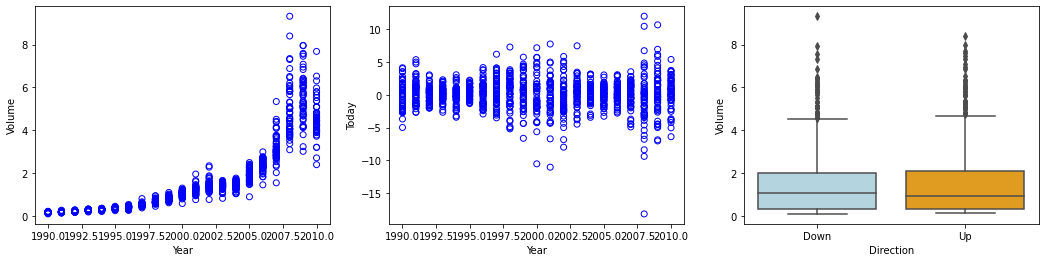

In [73]:

fig, (ax11,ax22,ax33) = plt.subplots(1,3,figsize=(18,4))



#  Volume vs. Year
ax11.scatter(wk.Year.values, wk.Volume.values, facecolors='none', edgecolors='b' )
ax11.set_xlabel('Year')
ax11.set_ylabel('Volume')

# Today vs. Year
ax22.scatter(wk.Year.values, wk.Today.values, facecolors='none', edgecolors='b' )
ax22.set_xlabel('Year')
ax22.set_ylabel('Today')


# Plot Lag1 vs Today's return
c_palette = {'Down':'lightblue', 'Up':'orange'}
sns.boxplot('Direction', 'Volume', data=wk, orient='v', ax=ax33, palette=c_palette)


Text(0, 0.5, 'Today')

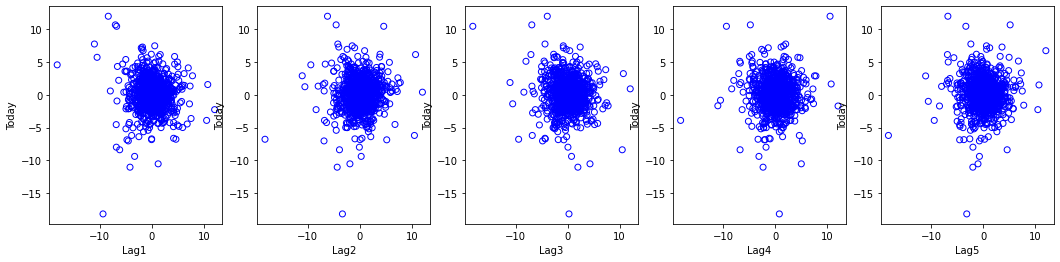

In [74]:

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(18,4))


# Plot Lag1 vs Today
ax1.scatter(wk.Lag1.values, wk.Today.values, facecolors='none', edgecolors='b' )
ax1.set_xlabel('Lag1 ')
ax1.set_ylabel('Today')

# Plot Lag2 vs Today
ax2.scatter(wk.Lag2.values, wk.Today.values, facecolors='none', edgecolors='b' )
ax2.set_xlabel('Lag2')
ax2.set_ylabel('Today')


# Plot Lag3 vs Today
ax3.scatter(wk.Lag3.values, wk.Today.values, facecolors='none', edgecolors='b' )
ax3.set_xlabel('Lag3')
ax3.set_ylabel('Today')

# Plot Lag4 vs Today
ax4.scatter(wk.Lag4.values, wk.Today.values, facecolors='none', edgecolors='b' )
ax4.set_xlabel('Lag4')
ax4.set_ylabel('Today')


# Plot Lag5 vs Today
ax5.scatter(wk.Lag5.values, wk.Today.values, facecolors='none', edgecolors='b' )
ax5.set_xlabel('Lag5')
ax5.set_ylabel('Today')

(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [17]:
pred = sm.add_constant(wk[wk.columns[1:7]])
dirc = np.array([1 if el=='Up' else 0 for el in wk.Direction.values])

q_413_b = sm.Logit(dirc,pred)
q_413_b_results = q_413_b.fit()
print(q_413_b_results.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 06 Feb 2022   Pseudo R-squ.:                0.006580
Time:                        21:26:28   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

Only Lag2 has a p<0.05 and is significant

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [18]:
dirc_predicted = q_413_b_results.predict(pred)
dirc_predicted= np.array(dirc_predicted > 0.5, dtype=float)
Ctable = np.histogram2d(dirc_predicted, dirc, bins=2)[0]
print(pd.DataFrame(Ctable, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(Ctable[0,0]+Ctable[1,1])/np.sum(Ctable))

       Down     Up
Down   54.0   48.0
Up    430.0  557.0


Error Rate = 0.43893480257116624


precision  = $\frac{557}{430+557}$ = $56\%$

type one error (false positive rate) = $\frac{430}{430+54} = 89\%$ 

type two error (false negative rate) = $\frac{48}{557+48} = 8\%$ 

sensitivity = 100% - 8% = 92%

The model has a very high false positive rate.

(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [19]:
predTest = sm.add_constant(wk[wk.Year > 2008].Lag2)
dircTest = np.array([1 if el=='Up' else 0 for el in wk[wk.Year > 2008].Direction])

predTrain = sm.add_constant(wk[wk.Year <= 2008].Lag2)
dircTrain = np.array([1 if el=='Up' else 0 for el in wk[wk.Year <= 2008].Direction])

q413_c_Train = sm.Logit(dircTrain,predTrain)
q413_c_Train_results=q413_c_Train.fit()
print(q413_c_Train_results.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Sun, 06 Feb 2022   Pseudo R-squ.:                0.003076
Time:                        21:47:30   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [20]:
dircTrain_predicted = q413_c_Train_results.predict(predTest)
dircTrain_predicted= np.array(dircTrain_predicted > 0.5, dtype=float)
CtableTrain = np.histogram2d(dircTrain_predicted, dircTest, bins=2)[0]
print(pd.DataFrame(CtableTrain, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(CtableTrain[0,0]+CtableTrain[1,1])/np.sum(CtableTrain))

      Down    Up
Down   9.0   5.0
Up    34.0  56.0


Error Rate = 0.375


(e) Repeat (d) using LDA.

In [22]:
LDAClf = LDA(solver='lsqr', store_covariance=True)

PredLDA_train = wk[wk.Year <= 2008].Lag2.values
PredLDA_train = PredLDA_train.reshape((len(PredLDA_train),1))

PredLDA_test = wk[wk.Year > 2008].Lag2.values
PredLDA_test = PredLDA_test.reshape((len(PredLDA_test),1))

LDAClf.fit(PredLDA_train, dircTrain)
print('Priors = ', LDAClf.priors_ )
print('Class Means = ', LDAClf.means_[0], LDAClf.means_[1])
print('Coefficients = ', LDAClf.coef_)
print('\n')

Priors =  [0.44771574 0.55228426]
Class Means =  [-0.03568254] [0.26036581]
Coefficients =  [[0.05780187]]




In [23]:

dircTrainLDA_predicted = LDAClf.predict(PredLDA_test)
dircTrainLDA_predicted= np.array(dircTrainLDA_predicted > 0.5, dtype=float)

CtableLDATrain = np.histogram2d(dircTrainLDA_predicted, dircTest, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(CtableLDATrain, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(CtableLDATrain[0,0]+CtableLDATrain[1,1])/np.sum(CtableLDATrain))

CONFUSION MATRIX
      Down    Up
Down   9.0   5.0
Up    34.0  56.0


Error Rate = 0.375


(f)Repeat (d) using QDA.

In [24]:
QDAClf = QDA( store_covariance=True)

PredQDA_train = wk[wk.Year <= 2008].Lag2.values
PredQDA_train = PredQDA_train.reshape((len(PredQDA_train),1))

PredQDA_test = wk[wk.Year > 2008].Lag2.values
PredQDA_test = PredQDA_test.reshape((len(PredQDA_test),1))

QDAClf.fit(PredQDA_train, dircTrain)


print('Priors = ', QDAClf.priors_ )
print('Class Means = ', QDAClf.means_[0], QDAClf.means_[1])
print('Coeffecients = ', QDAClf.covariance_)
print('\n')

Priors =  [0.44771574 0.55228426]
Class Means =  [-0.03568254] [0.26036581]
Coeffecients =  [array([[4.83781758]]), array([[5.37073888]])]




In [25]:

dircTrainQDA_predicted = QDAClf.predict(PredQDA_test)
dircTrainQDA_predicted= np.array(dircTrainQDA_predicted > 0.5, dtype=float)

CtableQDATrain = np.histogram2d(dircTrainQDA_predicted, dircTest, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(CtableLDATrain, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(CtableQDATrain[0,0]+CtableQDATrain[1,1])/np.sum(CtableQDATrain))

CONFUSION MATRIX
      Down    Up
Down   9.0   5.0
Up    34.0  56.0


Error Rate = 0.41346153846153844


(g) Repeat (d) using KNN with K = 1.

In [26]:
KNNClf = KNeighborsClassifier(n_neighbors=1)

PredKNN_train = wk[wk.Year <= 2008].Lag2.values
PredKNN_train = PredKNN_train.reshape((len(PredKNN_train),1))

PredKNN_test = wk[wk.Year > 2008].Lag2.values
PredKNN_test = PredKNN_test.reshape((len(PredKNN_test),1))

KNNClf.fit(PredKNN_train, dircTrain)

dircTrainKNN_predicted = KNNClf.predict(PredKNN_test)

CtableKNN = np.histogram2d(dircTrainKNN_predicted, dircTest , bins=2)[0]
print(pd.DataFrame(CtableKNN, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('Error Rate =', 1-(CtableKNN[0,0]+CtableKNN[1,1])/np.sum(CtableKNN))

      Down    Up
Down  21.0  30.0
Up    22.0  31.0

Error Rate = 0.5


(h) Repeat (d) using naive Bayes.

In [66]:
NBVclf = GaussianNB()

PredNB_train = wk[wk.Year <= 2008].Lag2.values
PredNB_train = PredNB_train.reshape((len(PredNB_train),1))

PredNB_test = wk[wk.Year > 2008].Lag2.values
PredNB_test = PredNB_test.reshape((len(PredNB_test),1))

NBVclf.fit(PredNB_train, dircTrain)

#print('Priors = ', NBVclf.priors_ )
#print('Class Means = ', NBVclf.means_[0], NBVclf.means_[1])
#print('Coeffecients = ', NBVclf.covariance_)
print('\n')

In [67]:
dircTrainNB_predicted = NBVclf.predict(PredNB_test)
dircTrainNB_predicted= np.array(dircTrainNB_predicted > 0.5, dtype=float)

CtableNBTrain = np.histogram2d(dircTrainNB_predicted, dircTest, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(CtableNBTrain, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(CtableNBTrain[0,0]+CtableNBTrain[1,1])/np.sum(CtableNBTrain))

CONFUSION MATRIX
      Down    Up
Down   0.0   0.0
Up    43.0  61.0


Error Rate = 0.41346153846153844


(i) Which of these methods appears to provide the best results on this data?

Comparing error rate, logistic model or LDA models work best.


(j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confu- sion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

##### 4.14.
In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [48]:
at = pd.read_csv('/Users/pruthvibharadwaj/Desktop/Spring 22/MA679 - ML/Homework/Auto.csv')
print( "There are", at.shape[0], "rows and ", at.shape[1], "columns in Auto dataset." )
at['MPG01'] = at.mpg > at.mpg.median()
at.head()

There are 392 rows and  9 columns in Auto dataset.


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,MPG01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,False
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,False
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,False
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,False
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,False


(b) Explore the data graphically in order to investigate the associ- ation between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scat- terplots and boxplots may be useful tools to answer this ques- tion. Describe your findings.

<AxesSubplot:title={'center':'acceleration'}, xlabel='MPG01'>

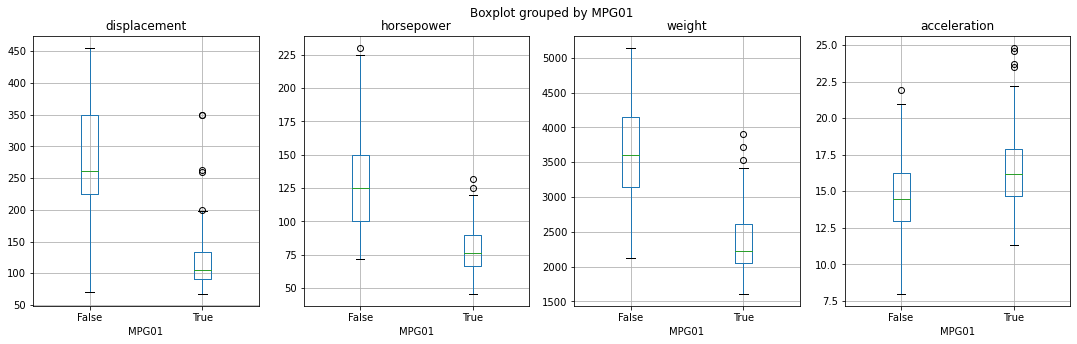

In [49]:
fig, ( ax2, ax3,ax4,ax5) = plt.subplots(1,4, figsize=(18,5))

at.boxplot(['displacement'], by='MPG01', ax=ax2)
at.boxplot(['horsepower'], by='MPG01', ax=ax3)
at.boxplot(['weight'],by='MPG01',ax=ax4)
at.boxplot(['acceleration'], by='MPG01', ax=ax5)

(c) Split the data into a training set and a test set.

In [53]:
n_samples = 392

rows_sample = np.random.choice([True, False], n_samples)

atTrain = at.loc[rows_sample]
atTest = at.loc[~rows_sample]

predictors = ['displacement','horsepower', 'weight', 'acceleration']
pred_train =  atTrain[predictors].values
mpg_train = atTrain['MPG01'].values
pred_test = atTest[predictors].values
mpg_test = atTest['MPG01'].values

(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [54]:

LDA_clf = LDA(solver='lsqr',store_covariance=True)
LDA_clf.fit(pred_train,mpg_train)

print('Class Priors =', LDA_clf.priors_)
print('Class Means =', LDA_clf.means_[0], LDA_clf.means_[1])
print('Coeffecients =', LDA_clf.coef_)


mpg_predicted = LDA_clf.predict(pred_test)
print('The error rate of the LDA model is ',np.mean(mpg_predicted!=mpg_test))

Class Priors = [0.55080214 0.44919786]
Class Means = [ 272.19417476  128.33980583 3609.86407767   14.63300971] [ 115.5952381    79.07142857 2347.14285714   16.43571429]
Coeffecients = [[-0.02325203  0.01734384 -0.00194521 -0.0069156 ]]
The error rate of the LDA model is  0.0975609756097561


(e)  Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [ ]:
QDA_clf = QDA()
QDA_clf.fit(pred_train,mpg_train)

print('Class Priors =', QDA_clf.priors_)
print('Class Means =', QDA_clf.means_[0], QDA_clf.means_[1])

mpgqda_predicted = QDA_clf.predict(pred_test)
print('The error rate of the QDA model is ',np.mean(mpgqda_predicted!=mpg_test))


(f) Perform logistic regression on the training data in order to pre- dict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [55]:
pred_train = sm.add_constant(atTrain[predictors])
pred_test = sm.add_constant(atTest[predictors])

log_clf = sm.Logit(mpg_train,pred_train)
log_clf_results = log_clf.fit()

print(log_clf_results.summary()) 
print(' Correlations  ' , atTrain[predictors].corr())

log_clf_predictions = log_clf_results.predict(pred_test)
mpg_log_clf_predicted = np.array(log_clf_predictions > 0.5, dtype=bool)
print('The error rate of the logistic model is ',np.mean(mpg_log_clf_predicted!=mpg_test))



Optimization terminated successfully.
         Current function value: 0.269036
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  187
Model:                          Logit   Df Residuals:                      182
Method:                           MLE   Df Model:                            4
Date:                Sun, 06 Feb 2022   Pseudo R-squ.:                  0.6089
Time:                        23:29:39   Log-Likelihood:                -50.310
converged:                       True   LL-Null:                       -128.65
Covariance Type:            nonrobust   LLR p-value:                 7.517e-33
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.0471      3.539      3.122      0.002       4.111      17.983
displacement    -0.0197

(g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [65]:
NB_clf = GaussianNB()
NB_clf.fit(pred_train,mpg_train)


mpgnb_predicted = NB_clf.predict(pred_test)
print('The error rate of the NB model is ',np.mean(mpgnb_predicted!=mpg_test))


The error rate of the NB model is  0.1024390243902439


(h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [56]:
pred_train =  atTrain[predictors].values
mpg_train = atTrain['MPG01'].values

pred_test = atTest[predictors].values
mpg_test = atTest['MPG01'].values


train_error_rate = np.zeros(10)
test_error_rate = np.zeros(10)
K = np.arange(1,11)

for i, j in enumerate(K):
    # Construct a KNN classifier and fit
    knn = KNeighborsClassifier(n_neighbors=j)
    knn.fit(pred_train,mpg_train)
    
    # use the model on the training data to get training error rate
    y_train_predicted = knn.predict(pred_train)
    # compute the training error rate for this k-value
    train_error_rate[i] = np.mean(y_train_predicted!=mpg_train)
    
    # Use the model on the held out test data
    mpg_test_predicted = knn.predict(pred_test)
    # compute the error rate for this k-value
    test_error_rate[i] = np.mean(mpg_test_predicted!=mpg_test)
    
print('The test error rate for k = 1 - 10 are: ', test_error_rate)

The test error rate for k = 1 - 10 are:  [0.11219512 0.14146341 0.11707317 0.11707317 0.11707317 0.11219512
 0.10243902 0.10243902 0.10731707 0.10731707]


##### 4.15. 
This problem involves writing functions.

(a) Write a function, Power(), that prints out the result of raising 2 to the 3rd power. In other words, your function should compute 23 and print out the results.
Hint: Recall that x^a raises x to the power a. Use the print() function to output the result.

In [38]:
def power():
    """ print 2**3 """
    print(2**3)
    
power()

8


(b) Create a new function, Power2(), that allows you to pass any two numbers, x and a, and prints out the value of x^a. You can do this by beginning your function with the line
> Power2 <- function(x, a) {

You should be able to call your function by entering, for instance,
> Power2(3, 8)

on the command line. This should output the value of 38, namely, 6, 561.

In [39]:

def power2(x,a):
    """ print x to the power of a """
    print(x**a)
    
power2(3,8)


6561


(c) Using the Power2() function that you just wrote, compute 103, 817, and 1313.

In [40]:
power2(10,3)
power2(8,17)
power2(131,3)

1000
2251799813685248
2248091


(d) Now create a new function, Power3(), that actually returns the result x^a as an R object, rather than simply printing it to the screen. That is, if you store the value x^a in an object called result within your function, then you can simply return() this result, using the following line:
> return(result)

The line above should be the last line in your function, before
the } symbol.

In [41]:
def power3(x,a):
    """ return x raised to a """
    return(x**a)

(e) Now using the Power3() function, create a plot of f(x) = x2. The x-axis should display a range of integers from 1 to 10, and the y-axis should display x2. Label the axes appropriately, and use an appropriate title for the figure. Consider displaying either the x-axis, the y-axis, or both on the log-scale. You can do this by using log = "x", log = "y", or log = "xy" as arguments to the plot() function.

Text(0, 0.5, 'log(y)')

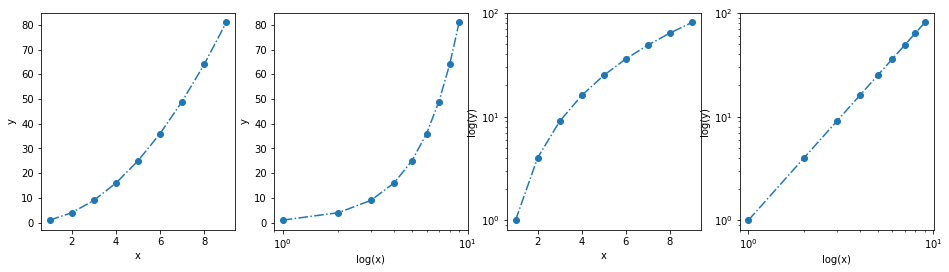

In [42]:
x = np.arange(1,10)
y = power3(x,2)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(16,4))

ax1.plot(x,y,linestyle='-.', marker='o')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.semilogx(x,y, linestyle='-.', marker='o')
ax2.set_xlabel('log(x)')
ax2.set_ylabel('y')

ax3.semilogy(x,y, linestyle='-.', marker='o')
ax3.set_xlabel('x')
ax3.set_ylabel('log(y)')

ax4.loglog(x,y, linestyle='-.', marker='o')
ax4.set_xlabel('log(x)')
ax4.set_ylabel('log(y)')



(f)Create a function, PlotPower(), that allows you to create a plot of x against x^a for a fixed a and for a range of values of x. For instance, if you call
> PlotPower(1:10, 3)


then a plot should be created with an x-axis taking on values 1,2,...,10, and a y-axis taking on values 13,23,...,103.

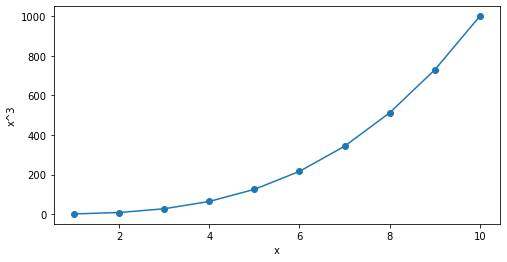

In [45]:
def plot_power(x,a):
    """Plots x vs x**a """
    y = x**a
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(x,y, linestyle = '-', marker = 'o')
    ax.set_xlabel('x')
    ax.set_ylabel('x^'+str(a))
    
plot_power(np.arange(1,11),3)

##### 4.16. 
Using the Boston data set, fit classification models in order to predict whether a given census tract has a crime rate above or below the me- dian. Explore logistic regression, LDA, naive Bayes, and KNN models using various subsets of the predictors. Describe your findings.
Hint: You will have to create the response variable yourself, using the variables that are contained in the Boston data set.
return()

In [30]:
#Loading and preparing dataset

BOS = load_boston()
predictors = BOS.data
response = BOS.target
boston_data = np.column_stack([predictors,response])
col_names = np.append(BOS.feature_names, 'MEDV')
BOS = pd.DataFrame(boston_data, columns = col_names)
BOS['CRIM01'] = pd.Series(BOS.CRIM > BOS.CRIM.median(), index=BOS.index)
BOS.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM01
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,False
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,False
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,False
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,False
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,False


In [37]:
#Logistic regression model

rows = np.random.choice([True, False], 506)
BOS_train = BOS.loc[rows]
BOS_test = BOS.loc[~rows]

predictors = ['NOX', 'AGE', 'PTRATIO', 'LSTAT', 'MEDV']
PRED_train = sm.add_constant(BOS_train[predictors])
PRED_test = sm.add_constant(BOS_test[predictors])

CRIM_train = BOS_train.CRIM01.values
CRIM_test = BOS_test.CRIM01.values

q416 = sm.Logit(CRIM_train, PRED_train)
q416results = q416.fit()
print(q416results.summary())

CRIM_predicted = q416results.predict(PRED_test) > 0.5
print('The error rate of the logistic model is ',np.mean(CRIM_predicted!=CRIM_test))

Optimization terminated successfully.
         Current function value: 0.304573
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  243
Model:                          Logit   Df Residuals:                      237
Method:                           MLE   Df Model:                            5
Date:                Sun, 06 Feb 2022   Pseudo R-squ.:                  0.5605
Time:                        22:49:02   Log-Likelihood:                -74.011
converged:                       True   LL-Null:                       -168.42
Covariance Type:            nonrobust   LLR p-value:                 7.017e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.5249      4.157     -6.140      0.000     -33.672     -17.378
NOX           33.6549      5.

In [35]:
#LDA

PRED_train = BOS_train[predictors].values
PRED_test = BOS_test[predictors].values

CRIM_train = BOS_train.CRIM01.values
CRIM_test = BOS_test.CRIM01.values

LDA_clf = LDA(solver='lsqr',store_covariance=True)
LDA_clf.fit(PRED_train,CRIM_train)

print('Class Priors =', LDA_clf.priors_)
print('Class Means =', LDA_clf.means_[0], LDA_clf.means_[1])
print('Coeffecients =', LDA_clf.coef_)

LDACRIM_predicted = LDA_clf.predict(PRED_test)
print('The error rate of the LDA model is ',np.mean(LDACRIM_predicted!=CRIM_test))

Class Priors = [0.52123552 0.47876448]
Class Means = [ 0.47057556 51.14074074 17.92740741  9.49755556 24.96962963] [ 0.63814516 85.03951613 18.71693548 16.16483871 19.82419355]
Coeffecients = [[2.56654640e+01 2.18041574e-02 2.84402649e-01 4.04767902e-02
  1.00117220e-01]]
The error rate of the LDA model is  0.1417004048582996


In [36]:
#KNN

train_error_rate = np.zeros(10)
test_error_rate = np.zeros(10)
K = np.arange(1,11)

for i, j in enumerate(K):
    # Construct a KNN classifier and fit
    knn = KNeighborsClassifier(n_neighbors=j)
    knn.fit(PRED_train,CRIM_train)
    
    # use the model on the training data to get training error rate
    CRIM_train_predicted = knn.predict(PRED_train)
    # compute the training error rate for this k-value
    train_error_rate[i] = np.mean(CRIM_train_predicted!=CRIM_train)
    
    # Use the model on the held out test data
    CRIM_test_predicted = knn.predict(PRED_test)
    # compute the error rate for this k-value
    test_error_rate[i] = np.mean(CRIM_test_predicted!=CRIM_test)
    
print('The test error rate for k = 1 - 10 are: ', test_error_rate)

print('The train error rate for k = 1 - 10 are: ', train_error_rate)

The test error rate for k = 1 - 10 are:  [0.23076923 0.25101215 0.19838057 0.21862348 0.19838057 0.21052632
 0.19838057 0.20242915 0.1902834  0.19433198]
The train error rate for k = 1 - 10 are:  [0.         0.15444015 0.13899614 0.17374517 0.16988417 0.16988417
 0.19305019 0.18532819 0.19305019 0.19305019]
